In [58]:
%cd AI/BCI/courses/signal_processing/1.denoising
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

[WinError 3] The system cannot find the path specified: 'AI/BCI/courses/signal_processing/1.denoising'
C:\Users\Viacheslav_Bobrov\AI\BCI\courses\signal_processing\1.denoising


In [70]:
eeg_mat = loadmat('denoising_codeChallenge.mat')
raw_signal = eeg_mat['origSignal'][0]
cleaned_signal = eeg_mat['cleanedSignal'][0]
n_data = len(raw_signal)

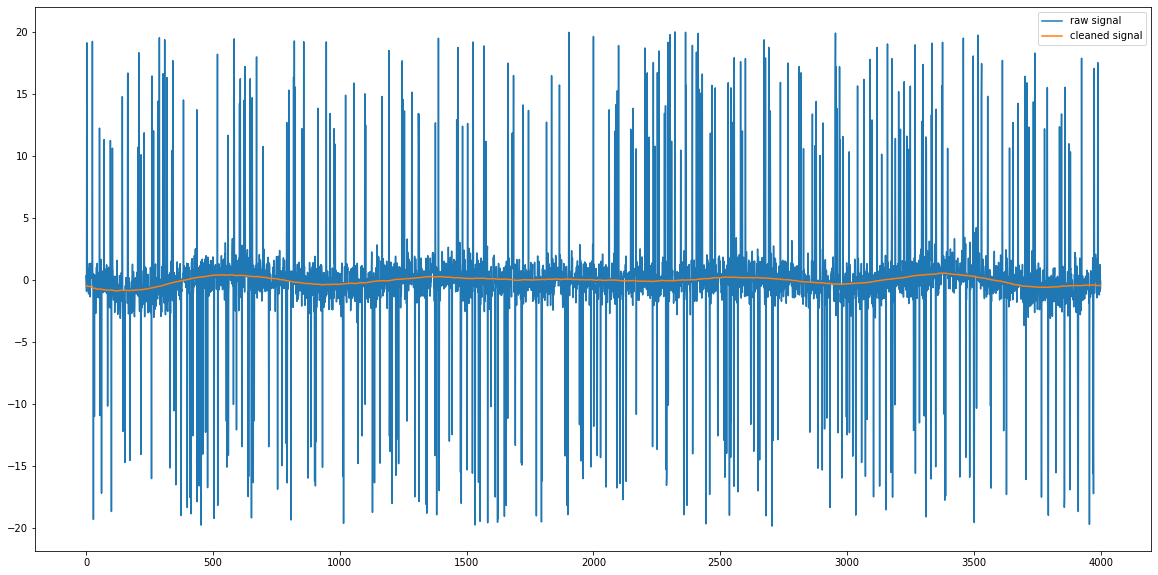

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(raw_signal, label='raw signal')
plt.plot(cleaned_signal, label='cleaned signal')
plt.legend()

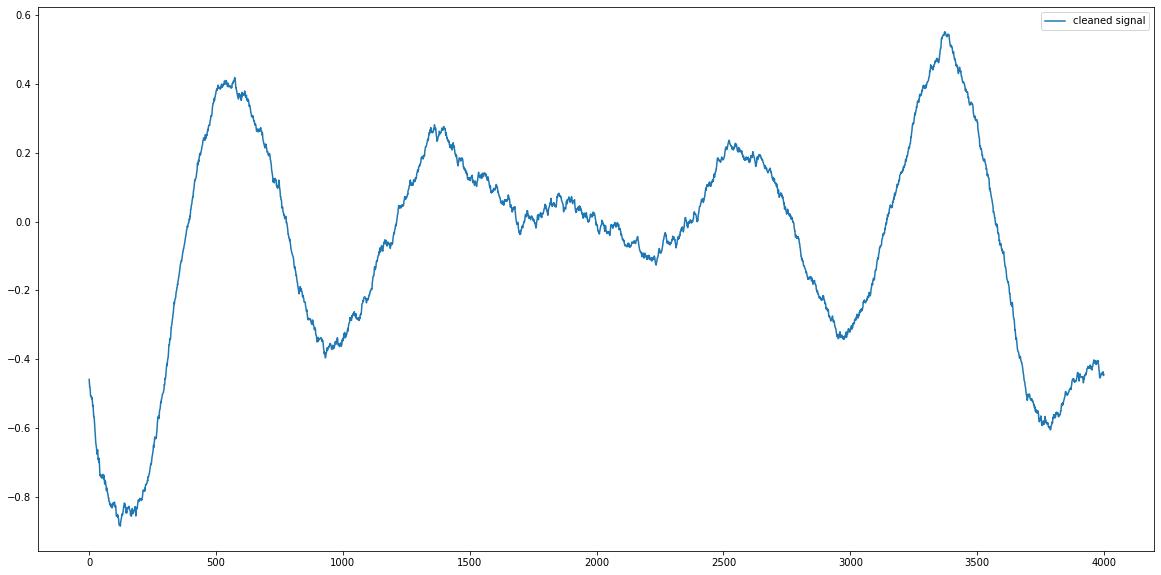

In [57]:
plt.figure(figsize=(20, 10))
plt.plot(cleaned_signal, label='cleaned signal')
plt.legend()

(array([9.500e+01, 7.600e+01, 2.900e+01, 0.000e+00, 1.963e+03, 1.636e+03,
        1.000e+00, 4.300e+01, 7.800e+01, 7.900e+01]),
 array([-19.82184375, -15.84222564, -11.86260752,  -7.88298941,
         -3.90337129,   0.07624682,   4.05586493,   8.03548305,
         12.01510116,  15.99471928,  19.97433739]),
 <a list of 10 Patch objects>)

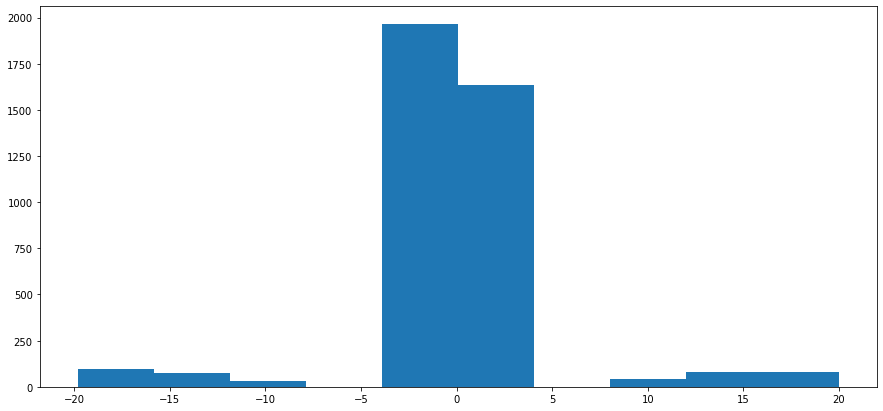

In [20]:
plt.figure(figsize=(15, 7))
plt.hist(raw_signal)

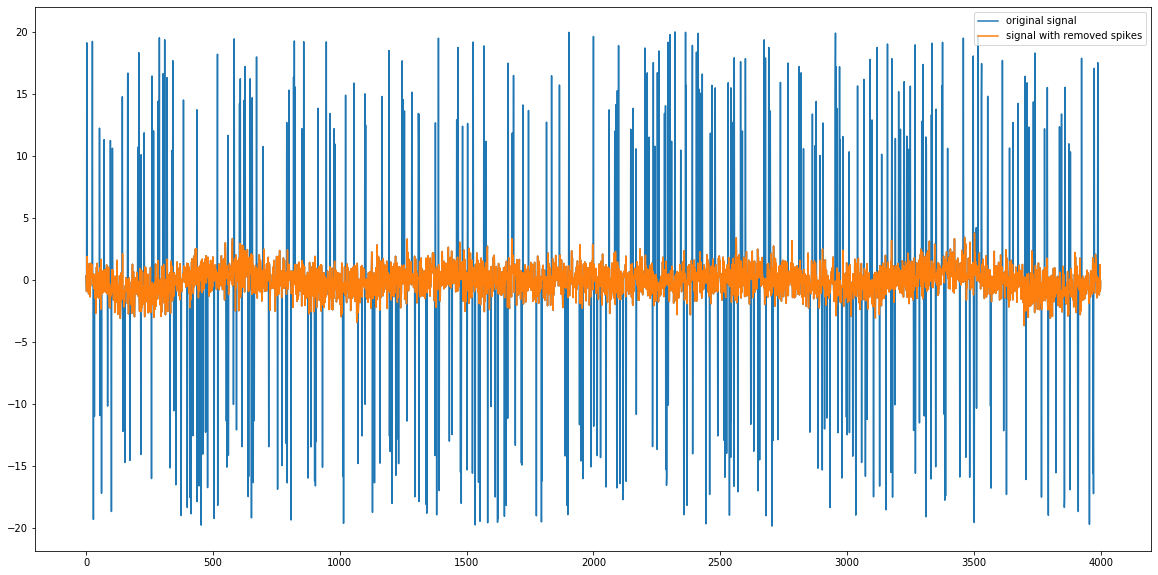

In [65]:
# Removing spikes
upper_spike_threshold = 4  # taken from hist above
lower_spike_threshold = -4

threshold_indices = np.argwhere((raw_signal < lower_spike_threshold) | (raw_signal > upper_spike_threshold)).ravel()

spike_filtered_signal = np.copy(raw_signal)
k = 20  # window = k * 2 + 1, for local median
for i in range(len(threshold_indices)):
    lower_bound = max(threshold_indices[i] - k, 0)
    upper_bound = min(threshold_indices[i] + k, n_data - 1)
    spike_filtered_signal[threshold_indices[i]] = np.median(raw_signal[lower_bound:upper_bound])

plt.figure(figsize=(20, 10))
plt.plot(raw_signal, label='original signal')
plt.plot(spike_filtered_signal, label='signal with removed spikes')
plt.legend()


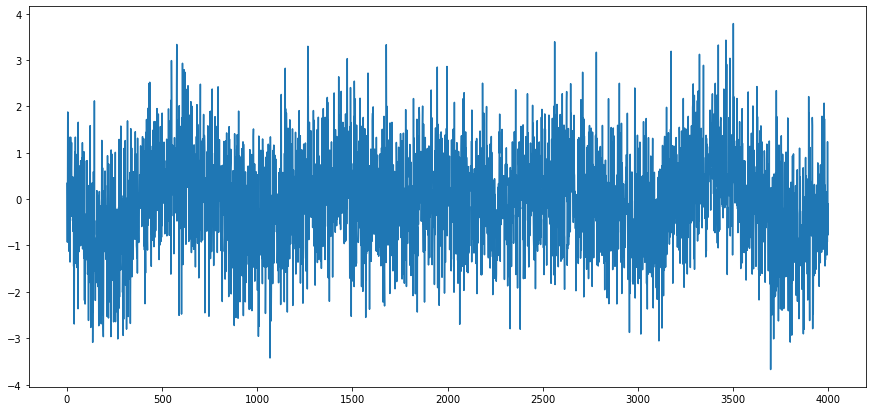

In [66]:
plt.figure(figsize=(15, 7))
plt.plot(spike_filtered_signal, label='signal with removed spikes')

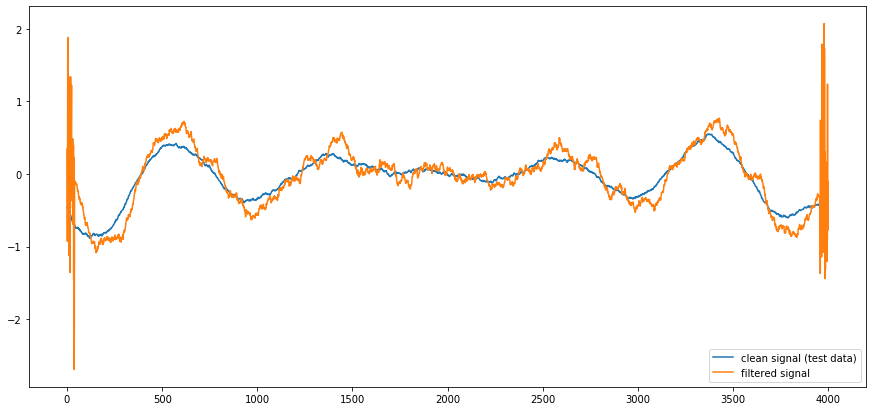

In [68]:
# Mean smooth filter

k = 40  # Filter window = k*2+1, the bigger k, the smoother is the signal
mean_filtered_signal = np.copy(spike_filtered_signal)
for i in range(k, len(mean_filtered_signal) - k - 1):
    mean_filtered_signal[i] = np.mean(spike_filtered_signal[i - k:i + k])
    
plt.figure(figsize=(15, 7))
plt.plot(cleaned_signal, label='clean signal (test data)')
plt.plot(mean_filtered_signal, label='filtered signal')
plt.legend()